In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/NLP_Final_Project

/content/drive/MyDrive/NLP_Final_Project


In [ ]:
!pip install PyPDF2
!pip install textract
!apt-get install -y poppler-utils
!apt-get install -y tesseract-ocr
!apt-get install -y tesseract-ocr-eng
import os
import PyPDF2
import textract
import nltk
nltk.download('punkt')

!apt-get install -y poppler-utils
!apt-get install -y tesseract-ocr
!apt-get install -y tesseract-ocr-eng

directory = '/content/drive/MyDrive/NLP_Final_Project/user_manuals_raw_data'
output_file = '/content/drive/MyDrive/NLP_Final_Project/data_files/data.txt'

def clean_text(text):
    return text.encode('utf-8', errors='replace').decode('utf-8')

extracted_texts = []

for filename in os.listdir(directory):
    if filename.endswith('.pdf'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)

            for page_num in range(len(pdf_reader.pages)):
                page = pdf_reader.pages[page_num]
                text = page.extract_text()

                if not text:  # If no text is found using PyPDF2, use textract
                    text = textract.process(filepath, method='tesseract', language='eng', pages=str(page_num))

                cleaned_text = clean_text(text if isinstance(text, str) else text.decode('utf-8'))
                extracted_texts.append(cleaned_text)

with open(output_file, 'w') as output:
    output.write(' '.join(extracted_texts))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 84.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 102.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.8 MB/s eta 0:

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!pip install langdetect
import re
import nltk
from langdetect import detect
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

def filter_english_sentences(sentences):
    english_sentences = []
    for sentence in sentences:
        try:
            if detect(sentence) == 'en':
                english_sentences.append(sentence)
        except:
            pass
    return english_sentences

def clean_text(text):
    # Remove "Downloaded from..." line
    text = re.sub("Downloaded from www.Manualslib.com  manuals search engine", "", text)

    # Remove section titles and headings
    text = re.sub(r'^[A-Z].*[\n]', '', text, flags=re.MULTILINE)  # Titles followed by a newline
    text = re.sub(r'\b[A-Z]{2,}\b', '', text)  # Acronyms with at least 2 uppercase letters

    # Split text into sentences
    sentences = nltk.sent_tokenize(text)

    # Filter out non-English sentences
    sentences = filter_english_sentences(sentences)

    cleaned_sentences = []
    for sentence in sentences:
        # Remove line breaks
        sentence = sentence.replace('\n', ' ')

        # Lowercase the sentence
        sentence = sentence.lower()

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = sentence.split()
        sentence = ' '.join([word for word in words if word not in stop_words])

        cleaned_sentences.append(sentence)

    return ' '.join(cleaned_sentences)

# Read the text from the file
with open("/content/drive/MyDrive/NLP_Final_Project/data_files/data.txt", "r") as f:
    data = f.read()

# Clean the text
cleaned_data = clean_text(data)

# Save the cleaned text to a new text file
with open("/content/drive/MyDrive/NLP_Final_Project/data_files/cleaned_data.txt", "w") as f:
    f.write(cleaned_data)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=800b6d5dbde7928de64e60c64122d02fb4091ece3cd82a2a7264eea5a49ad5b8
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install bert-extractive-summarizer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.6 MB/s eta 0:00:00


In [ ]:
with open('/content/drive/MyDrive/NLP_Final_Project/data_files/cleaned_data.txt', 'r') as f:
    data = f.read()

paragraphs = data.split("\n\n")


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# Load the cleaned text from the file
with open("/content/drive/MyDrive/NLP_Final_Project/data_files/cleaned_data.txt", "r") as f:
    data = f.read()

# Split the text into sections of a fixed length (e.g. 1000 characters)
section_length = 1000
sections = re.findall('.{1,%d}(?:\s+|$)' % section_length, data)

# Split the data into training and testing sets (80% for training, 20% for testing)
train_sections, test_sections = train_test_split(sections, test_size=0.2, random_state=42)

# Save the training and testing data into separate files
with open('/content/drive/MyDrive/NLP_Final_Project/data_files/train.txt', 'w') as f:
    f.write('\n\n'.join(train_sections))

with open('/content/drive/MyDrive/NLP_Final_Project/data_files/test.txt', 'w') as f:
    f.write('\n\n'.join(test_sections))


In [ ]:
# Import necessary libraries
import torch
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Set the device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the BERT model for sequence classification
class BERTSum(torch.nn.Module):
    def __init__(self):
        super(BERTSum, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.fc = torch.nn.Linear(self.bert.config.hidden_size, 1)
    
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs[0][:, 0]
        logits = self.fc(cls_output)
        return logits

# Initialize the BERTSum model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTSum().to(device)

# Define the dataset class
class SumDataset(Dataset):
    def __init__(self, sections):
        self.sections = sections
    
    def __len__(self):
        return len(self.sections)
    
    def __getitem__(self, idx):
        section = self.sections[idx]
        encoding = tokenizer.encode_plus(
            section,
            max_length=512,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze()
        }

# Define the collate function
def collate_fn(data):
    input_ids = torch.stack([item['input_ids'] for item in data])
    attention_mask = torch.stack([item['attention_mask'] for item in data])
    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask
    }

# Load the sections from the file
with open('/content/drive/MyDrive/NLP_Final_Project/data_files/train.txt', 'r') as f:
    data = f.read()

# Split the data into sections of a fixed length (e.g. 1000 characters)
section_length = 1000
sections = re.findall('.{1,%d}(?:\s+|$)' % section_length, data)

# Create the dataset
dataset = SumDataset(sections)

# Create the data loader
batch_size = 7
loader = DataLoader(dataset, batch_size=batch_size, collate_fn=collate_fn)

# Define the loss function
loss_fn = torch.nn.BCEWithLogitsLoss()

# Define the optimizer
lr = 1e-5
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Train the model
epochs = 10
for epoch in range(epochs):
    epoch_loss = 0
    for batch in loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        logits = model(input_ids, attention_mask)
        loss = loss_fn(logits.squeeze(), torch.ones(input_ids.shape[0], device=device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print('Epoch: {}, Loss: {:.4f}'.format(epoch+1, epoch_loss/len(loader)))

# Save the trained model
torch.save(model.state_dict(), '/content/drive/MyDrive/NLP_Final_Project/bertsum_model.pth')


Epoch: 1, Loss: 0.0158
Epoch: 2, Loss: 0.0004
Epoch: 3, Loss: 0.0002
Epoch: 4, Loss: 0.0002
Epoch: 5, Loss: 0.0001
Epoch: 6, Loss: 0.0001
Epoch: 7, Loss: 0.0001
Epoch: 8, Loss: 0.0001
Epoch: 9, Loss: 0.0001
Epoch: 10, Loss: 0.0001


In [ ]:
with open('/content/drive/MyDrive/NLP_Final_Project/data_files/data.txt', 'r') as f:
    data = f.read()
print(len(data))


3270437


In [ ]:
# Load the saved model
model.load_state_dict(torch.load('/content/drive/MyDrive/NLP_Final_Project/bertsum_model.pth'))

# Load the test data
with open('/content/drive/MyDrive/NLP_Final_Project/data_files/test.txt', 'r') as f:
    data = f.read()

# Split the data into sections of a fixed length (e.g. 1000 characters)
section_length = 1000
sections = re.findall('.{1,%d}(?:\s+|$)' % section_length, data)

# Create the test dataset
test_dataset = SumDataset(sections)

# Create the test data loader
test_loader = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn)

# Evaluate the model on the test set
total_loss = 0
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        logits = model(input_ids, attention_mask)
        target = torch.ones(input_ids.shape[0], device=device).unsqueeze(-1) # Add an extra dimension
        loss = loss_fn(logits.squeeze(), target.squeeze())
        total_loss += loss.item()
avg_loss = total_loss / len(test_loader)

print('Test Loss: {:.4f}'.format(avg_loss))


Test Loss: 0.0001


In [ ]:
import torch
import re
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
import torch.nn as nn

# Define the BERTSum class
class BERTSum(nn.Module):
    def __init__(self):
        super(BERTSum, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.fc = nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        logits = self.fc(outputs[0]).squeeze(-1)
        return logits

# Define the SumDataset class
class SumDataset(Dataset):
    def __init__(self, sections):
        self.sections = sections

    def __len__(self):
        return len(self.sections)

    def __getitem__(self, idx):
        return self.sections[idx]

# Define the collate_fn function
def collate_fn(batch):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    encoded_batch = tokenizer(batch, padding=True, truncation=True, return_tensors='pt')
    return encoded_batch

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the model and tokenizer
model = BERTSum().to(device)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load the trained model
model.load_state_dict(torch.load('/content/drive/MyDrive/NLP_Final_Project/bertsum_model.pth'))

# Load the test data
with open('/content/drive/MyDrive/NLP_Final_Project/data_files/test.txt', 'r') as f:
    test_data = f.read()

# Split the data into sections of a fixed length (e.g. 1000 characters)
section_length = 1000
test_sections = re.findall('.{1,%d}(?:\s+|$)' % section_length, test_data)

# Create the dataset
test_dataset = SumDataset(test_sections)

# Create the data loader
batch_size = 1
test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_fn)

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    for batch in test_loader:
        # Get the input and attention mask
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        
        # Generate the summary
        logits = model(input_ids, attention_mask)
        if logits.dim() == 0:
            predicted_summary = ''
        else:
            if logits.dim() > 1:
                logits = logits.squeeze()
            print("logits shape: ", logits.shape)
            k_value = logits.size(0)
            top_k_indices = torch.topk(logits, k=k_value, dim=0)[1]
            predicted_summary = tokenizer.decode([token_id for token_id in top_k_indices if token_id > 3])


        print('Predicted Summary: ', predicted_summary)
        print('--------------------------------------------------')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


logits shape:  torch.Size([219])
Predicted Summary:  [unused212] [unused165] [unused192] [unused138] [unused150] [unused195] [unused47] [unused159] [unused92] [unused185] [unused94] [unused141] [unused180] [unused97] [unused197] [unused203] [unused120] [unused178] [unused207] [unused112] [unused128] [unused173] [unused206] [unused171] [unused111] [unused75] [unused186] [unused144] [unused96] [unused66] [unused121] [unused64] [unused157] [unused188] [unused109] [unused100] [unused49] [unused126] [unused194] [unused190] [unused137] [unused193] [unused152] [unused69] [unused142] [unused187] [unused67] [unused211] [unused42] [unused119] [unused182] [unused113] [unused140] [unused48] [unused46] [unused28] [unused114] [unused81] [unused101] [unused200] [unused110] [unused56] [unused179] [unused149] [unused202] [unused191] [unused26] [unused27] [unused116] [unused164] [unused177] [unused99] [unused209] [unused146] [unused175] [unused168] [unused95] [unused84] [unused122] [unused98] [unused176

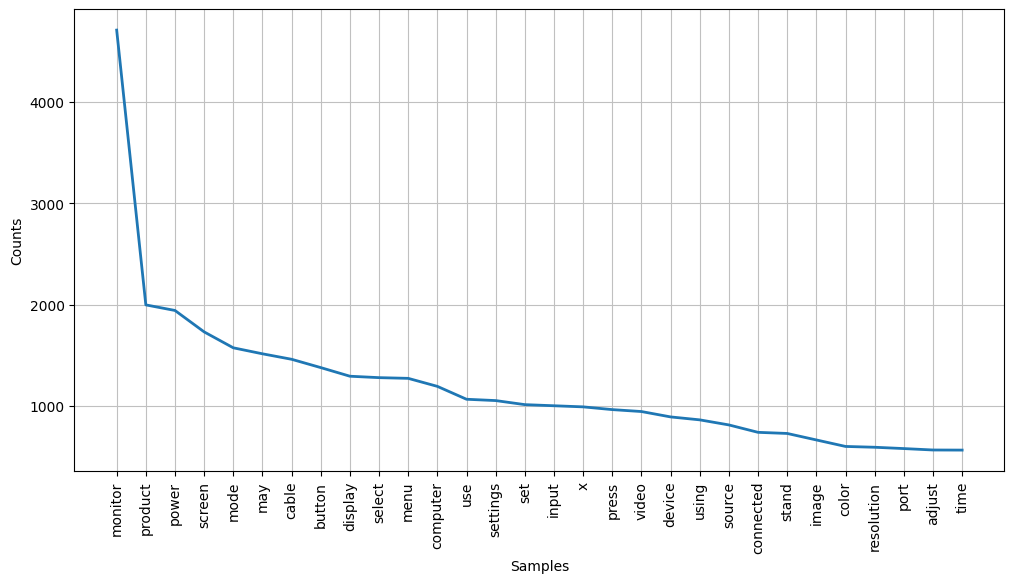

In [ ]:
import nltk
import matplotlib.pyplot as plt

# read the text file
with open('/content/drive/MyDrive/NLP_Final_Project/data_files/cleaned_data.txt', 'r') as file:
    data = file.read().replace('\n', '')

# tokenize the words
words = nltk.word_tokenize(data.lower())

# remove stop words and punctuations
stop_words = set(nltk.corpus.stopwords.words('english'))
words = [word for word in words if word.isalpha() and word not in stop_words]

# calculate the frequency distribution
freq_dist = nltk.FreqDist(words)

# plot the graph
plt.figure(figsize=(12, 6))
freq_dist.plot(30)
plt.show()


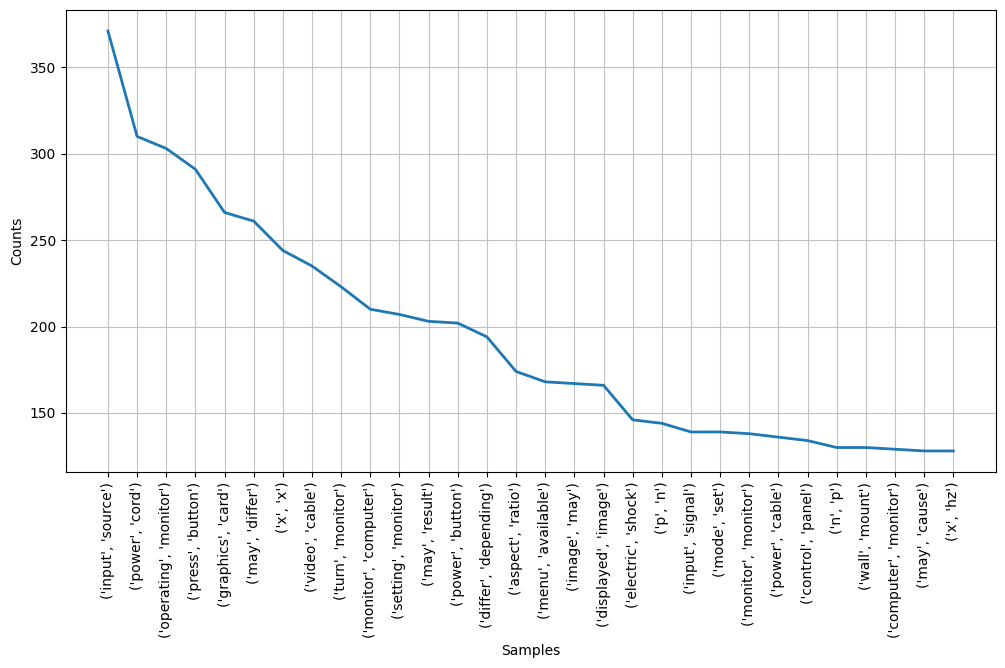

In [ ]:
import nltk
from nltk import FreqDist
from nltk.util import ngrams
import matplotlib.pyplot as plt

# read the data from the file
with open('/content/drive/MyDrive/NLP_Final_Project/data_files/cleaned_data.txt', 'r') as f:
    data = f.read()

# tokenize the words
words = nltk.word_tokenize(data.lower())

# remove stop words and punctuations
stop_words = nltk.corpus.stopwords.words('english')
words = [word for word in words if word.isalpha() and word not in stop_words]

# get the bigrams
bigrams = ngrams(words, 2)

# count the frequency of each bigram
freq_dist = FreqDist(bigrams)

# plot the graph
plt.figure(figsize=(12, 6))
freq_dist.plot(30)
plt.show()


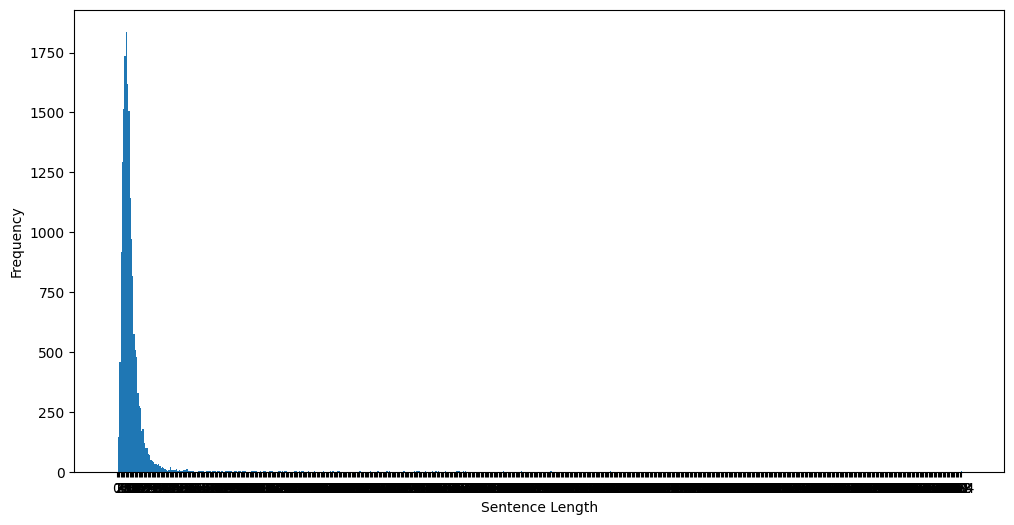

In [ ]:
import nltk
import matplotlib.pyplot as plt

# read in the data
with open('/content/drive/MyDrive/NLP_Final_Project/data_files/cleaned_data.txt', 'r') as f:
    data = f.read()

# tokenize the sentences
sentences = nltk.sent_tokenize(data)

# get the length of each sentence
sentence_lengths = [len(sentence.split()) for sentence in sentences]

# create a histogram of the distribution of sentence lengths
plt.figure(figsize=(12, 6))
plt.hist(sentence_lengths, bins=range(max(sentence_lengths)+2))
plt.xticks(range(max(sentence_lengths)+1))
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()


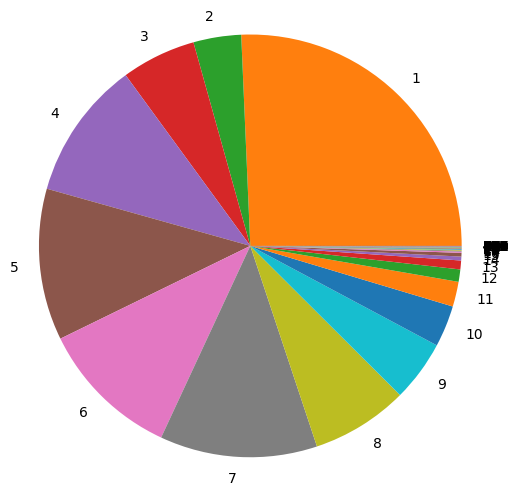

In [ ]:
import nltk
import matplotlib.pyplot as plt

# read in the data
with open('/content/drive/MyDrive/NLP_Final_Project/data_files/cleaned_data.txt', 'r') as f:
    data = f.read()

# tokenize the words
words = nltk.word_tokenize(data.lower())

# get the length of each word
word_lengths = [len(word) for word in words]

# create a frequency distribution of word lengths
freq_dist = nltk.FreqDist(word_lengths)

# create a pie chart of the distribution of word lengths
plt.figure(figsize=(6, 6))
labels = [str(i) for i in range(max(word_lengths)+1)]
sizes = [freq_dist[i] for i in range(max(word_lengths)+1)]
plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.show()


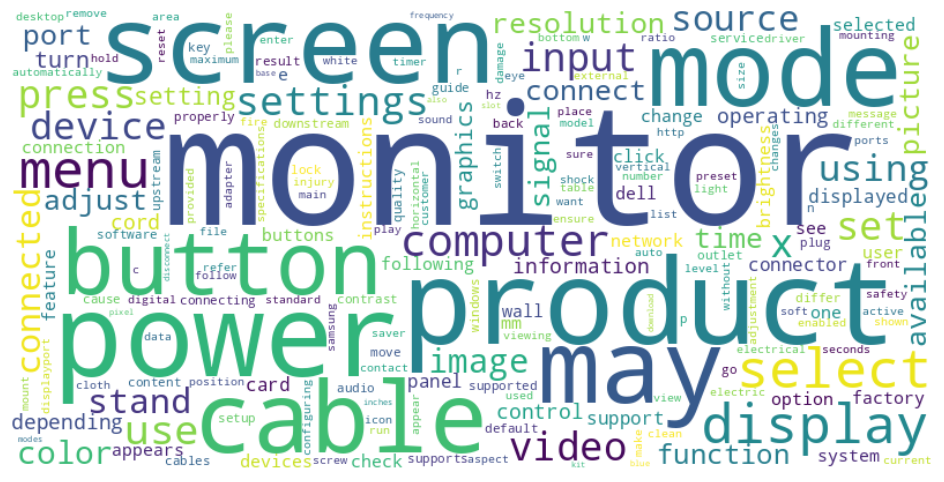

In [ ]:
import nltk
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the data
with open("/content/drive/MyDrive/NLP_Final_Project/data_files/cleaned_data.txt") as file:
    data = file.read()

# Tokenize the data
tokens = nltk.word_tokenize(data.lower())

# Remove stopwords and punctuation
stop_words = nltk.corpus.stopwords.words('english')
words = [word for word in tokens if word.isalpha() and word not in stop_words]

# Get frequency distribution of words
word_freq = FreqDist(words)

# Generate wordcloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_freq)

# Plot the graph
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
